In [3]:
import os, cv2,logging,sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import seaborn as sns

logging.disable(logging.WARNING)

%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Approach:- 
Dataset used: Advertising dataset, less features, easy to explain to beginners

Data cleaning

Should we go for standardization or normalization?(First lets build model without using this,lets use this afterwards)#preferred Standardization

Visualize and explain how each feature is affecting the output variable using Simple linear regression

Understand p-value, F-statistic, coeficients in linear regression, R square metric

Use Multiple Regression where we will be using all the features as input to the model and get better understanding how each feature is affecting the output variable

Reference: Introduction to Statistics in R book



In [4]:
data = pd.read_csv("advertising.csv")

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Above table gives us the statistics of the data

In [7]:
data.isnull().values.any()

False

# Dataset doesn't have any null or missing values, so needn't use any data imputations techniques 

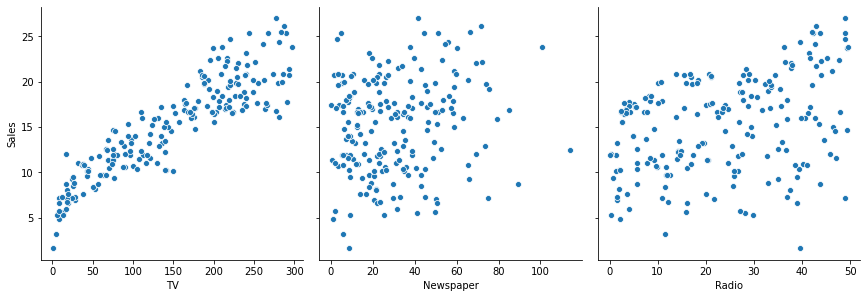

In [8]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',
             height=4, aspect=1, kind='scatter')
plt.show()

# Explain about how the sales are dependent on different types of the  advertisements using above graphs

# Simple Linear Regression Model for Sales using TV advertisements




In [9]:
#plotting a scatterplot using dataframe

#data.plot.scatter(x='TV', y='Sales', title= "Scatter plot between two variables TV and Sales");

#plt.show(block=True);

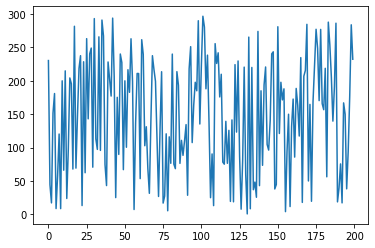

In [10]:
plt.plot(data['TV'])

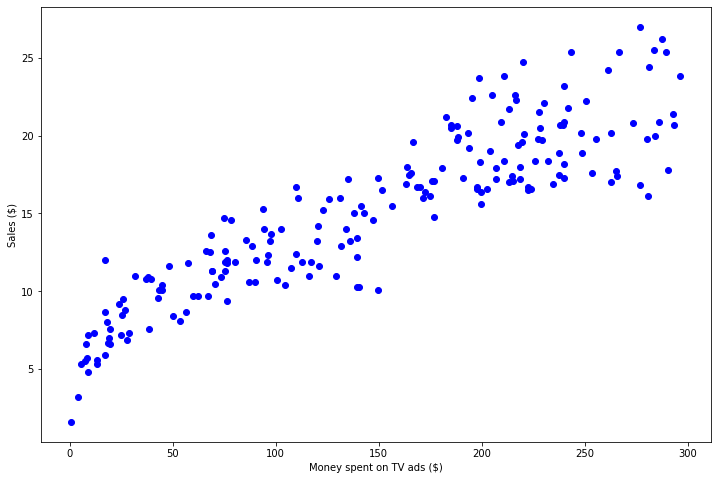

In [11]:
plt.figure(figsize=(12, 8))

plt.scatter(
    data['TV'],
    data['Sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [12]:
X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 6.9748 + 0.055465X


# Explain about the coeficients of simple linear regression
If we don't spend anything on the advertisement then the number of units that
will be sold are b0 i.e. 6,974 units.

If we spend 1000$ on TV advertisements then sales will increase by 55 units (b1 coeficient)

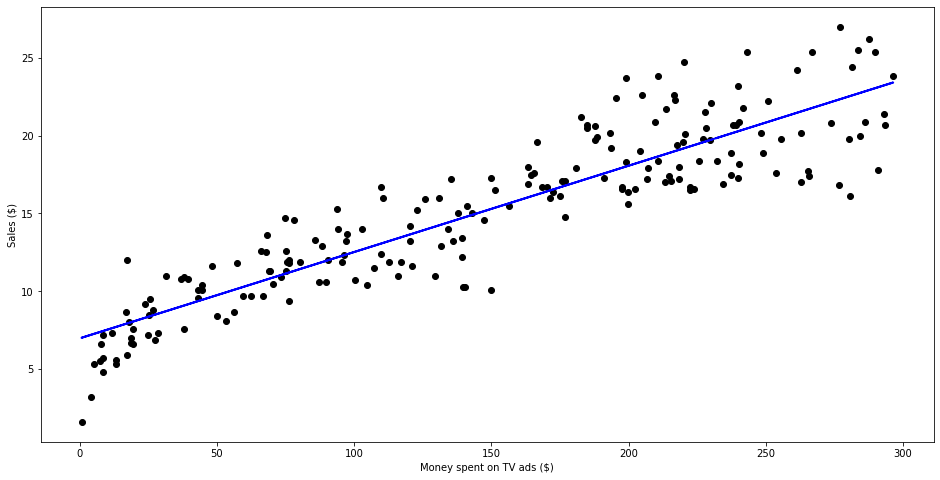

In [13]:
predictions = reg.predict(X)
plt.figure(figsize=(16, 8))
plt.scatter(
    data['TV'],
    data['Sales'],
    c='black'
)
plt.plot(
    data['TV'],
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

(0.0, 30.0)

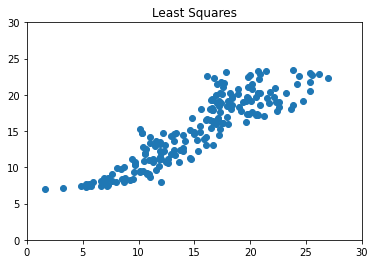

In [14]:
fig, ax = plt.subplots()
ax.scatter(data['Sales'],predictions)
ax.set_title('Least Squares')
ax.set_ylim(0,30)
ax.set_xlim(0,30)

In [15]:
residuals=data['Sales'].values.reshape(200,1)-predictions
mean_res=np.mean(residuals)
print("Mean of Residuals {}".format(mean_res))

Mean of Residuals -1.652011860642233e-15


Text(0.5, 1.0, 'Residuals vs fitted values plot for homoscedasticity check')

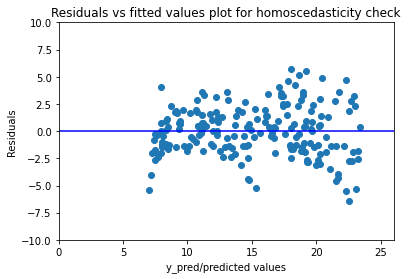

In [16]:
plt.scatter(predictions,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
plt.ylim(-10,10)
plt.xlim(0,26)
sns.lineplot([0,26],[0,0],color='blue')
plt.title('Residuals vs fitted values plot for homoscedasticity check')

Text(0.5, 1.0, 'Normality of error terms/residuals')

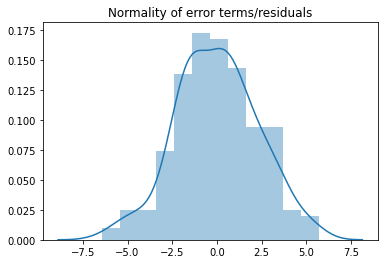

In [17]:
sns.distplot(residuals,kde=True)
plt.title('Normality of error terms/residuals')

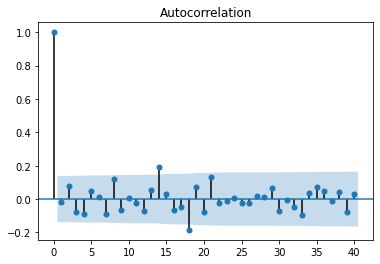

In [18]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.show()

In [19]:
X = np.column_stack((data['TV'])).reshape(200,1)
y = data['Sales'].values.reshape(-1,1)
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     856.2
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           7.93e-74
Time:                        12:31:48   Log-Likelihood:                -448.99
No. Observations:                 200   AIC:                             902.0
Df Residuals:                     198   BIC:                             908.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9748      0.323     21.624      0.0

P value is less than 0.000, x1 coeficient is greater than standard error,hence we reject the null hypothesis

R-squarred =0.812 so 81% of variability in Sales is explained by TV advertisement

In [20]:
def check_res(y_true,y_pred):

  fig, ax = plt.subplots()
  ax.scatter(y_true,y_pred)
  ax.set_title('Least Squares')
  ax.set_ylim(0,30)
  ax.set_xlim(0,30)
  plt.show()

  residuals=y_true-y_pred
  mean_res=np.mean(residuals)
  print("Mean of Residuals {}".format(mean_res))

  plt.scatter(y_pred,residuals)
  plt.xlabel('y_pred/predicted values')
  plt.ylabel('Residuals')
  plt.ylim(-10,10)
  plt.xlim(0,26)
  sns.lineplot([0,26],[0,0],color='blue')
  plt.title('Residuals vs fitted values plot for homoscedasticity check')
  plt.show()
  
  sns.distplot(residuals,kde=True)
  plt.title('Normality of error terms/residuals')

  sm.graphics.tsa.plot_acf(residuals, lags=40)
  plt.show()

In [21]:
def simple_linear_regression(X,y_true,feature_name):
  '''
  Args:
    X-input
    y_true->ground truth
    feature_name -> name of the feature used
  Returns:
    None
  '''
  plt.plot(X)
  plt.show()

  plt.figure(figsize=(12, 8))

  plt.scatter(
      X,
      y_true,
      c='blue'
  )
  plt.xlabel("Money spent on "+feature_name+" ads ($)")
  plt.ylabel("Sales ($)")
  plt.show()

  reg = LinearRegression()
  reg.fit(X, y_true)
  print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))


  predictions = reg.predict(X)
  plt.figure(figsize=(16, 8))
  plt.scatter(
      X,
      y_true,
      c='black'
  )
  plt.plot(
      X,
      predictions,
      c='blue',
      linewidth=2
  )
  plt.xlabel("Money spent on "+feature_name+" ads ($)")
  plt.ylabel("Sales ($)")
  plt.show()

  check_res(y_true,predictions)

  X = np.column_stack((data['Radio'])).reshape(200,1)
  y = data['Sales'].values.reshape(-1,1)
  X2 = sm.add_constant(X)
  est = sm.OLS(y, X2)
  est2 = est.fit()
  print(est2.summary())

In [22]:
# Simple Linear Regression Model for Sales using Radio advertisements

In [23]:
#simple_linear_regression(data['Radio'].values.reshape(200,1),data['Sales'].values.reshape(200,1),'Radio')

Explain about radio advertisements impact on sales

In [24]:
#simple_linear_regression(data['Newspaper'].values.reshape(200,1),data['Sales'].values.reshape(200,1),'Newspaper')

Explain about impact of Newspaper advertisements on Sales

# Multiple Linear Regression

In [25]:
Xs = data.drop(['Sales'], axis=1)
print(Xs.head())
y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1], reg.coef_[0][2]))

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
The linear model is: Y = 4.6251 + 0.054446*TV + 0.107*radio + 0.00033566*newspaper


If we spend 1000$ on TV advertisements then 54 more units will be sold

If we spend 1000$ on Radio advertisements then 107 more units will be sold

If we spend 1000$ on Newspaper advertisements then not even one extra item will be sold

When we have used Simple Linear Regression we found that for each 1000$ spent on Newspaper advertisements there will be increase in sales by 38 units. But when we considered all the features together to build a model we found out that Newspaper advertisements are not playing any role in increasing sales at all because there is a correlation between radio advertisements and newspaper advertisements. When advertisements are done to same customer using radio and newspaper they are actually buying the product because of radio advertisement and not because of newspaper ad.


Pearson correlation coefficient:
                 TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.901208
Radio      0.054809  1.000000   0.354104  0.349631
Newspaper  0.056648  0.354104   1.000000  0.157960
Sales      0.901208  0.349631   0.157960  1.000000


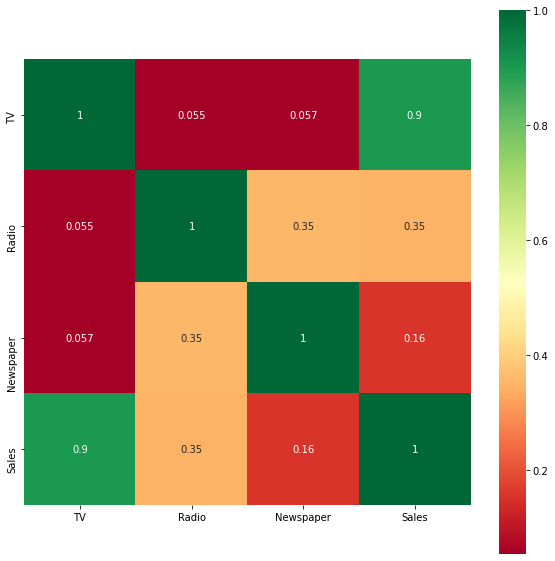

In [26]:
corrrelation= data.corr(method="pearson")
print("Pearson correlation coefficient:")
print(corrrelation);



plt.figure(figsize=(10,10))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',square=True) 

Explain about Pearson correlation coefficient.

We need to have correlation b/w input feature and output

We should select one input feature if multiple input features are highly correlated

In [27]:
predictions = reg.predict(Xs)

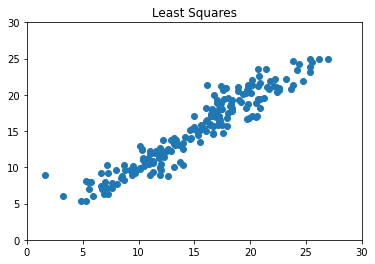

Mean of Residuals -2.660094367001875e-15


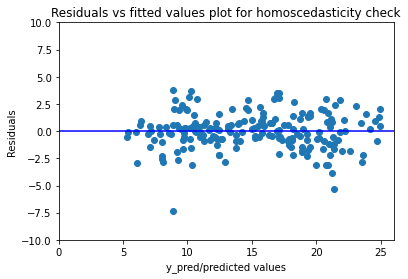

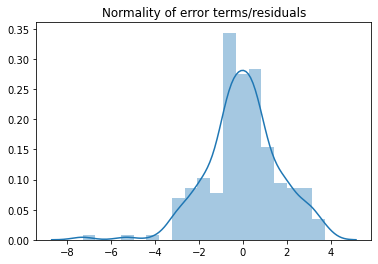

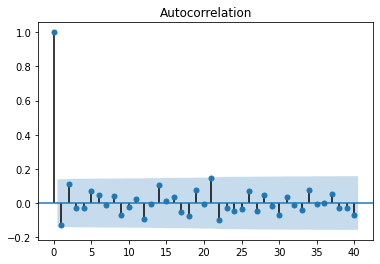

In [28]:
check_res(data['Sales'].values.reshape(200,1),predictions)

In [29]:
X = np.column_stack((data['TV'], data['Radio'], data['Newspaper']))
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           8.13e-99
Time:                        12:32:01   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.0

In [30]:
Xs = data.drop(['Sales','Newspaper'],axis=1)

print(Xs.head())
y = data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(Xs, y)
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio ".format(reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]))

      TV  Radio
0  230.1   37.8
1   44.5   39.3
2   17.2   45.9
3  151.5   41.3
4  180.8   10.8
The linear model is: Y = 4.6309 + 0.054449*TV + 0.10717*radio 


In [31]:
X = np.column_stack((data['TV'], data['Radio']))
y = data['Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Thu, 30 Jul 2020   Prob (F-statistic):          2.39e-100
Time:                        12:32:05   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6309      0.290     15.952      0.0

#Remaining Standardization of data